<a href="https://colab.research.google.com/github/CHARM1997/Data-Science---Colab/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train =  pd.read_csv('train.csv') #import train data set
test = pd.read_csv('test.csv') #import test data set

In [4]:
#Drop null values
train = train.dropna() 
test = test.dropna()

In [9]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


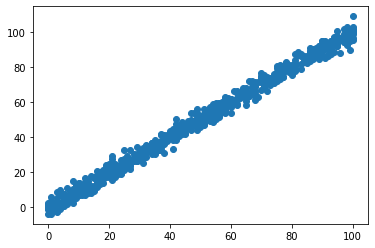

In [10]:
plt.scatter(train['x'], train['y'])

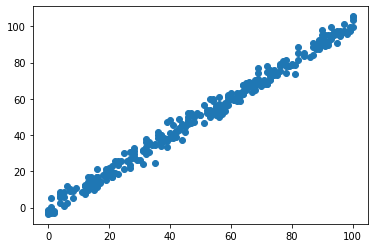

In [11]:
plt.scatter(test['x'], test['y'])

In [12]:
#Set training data and target
X_train = train['x'].values
y_train = train['y'].values
#Set testing data and target
X_test = test['x'].values
y_test = test['y'].values

**Data Preprocessing**

In [13]:
maximum = X_train.max()

In [14]:
#Now let's scale the data
X_train_norm = X_train / maximum
X_test_norm = X_test / maximum

**Model** 

The model function for linear regression, which is a function that maps from x to y is represented as: fw,b(x)=wx+b
To train a linear regression model, We want to find the best (w,b) parameters that fit our dataset.
We'll evaluate our results using a cost function

Initialize Parameters

First of all we'll start by initializing our parameters (w,b)
for the model

In [15]:
# for Linear Regression it is ok to initialize parameters to zero
def initialize_parameters():
    W = 0
    b = 0
    return W, b

Now let's make a function to help us in prediction 
As a reminder we'll use vectorized implementations for speed up
(Vectorization is a way to speed up mathematical operations)

In [16]:
def predict(X,W,b):
    prediction = np.dot(X,W) + b
    return prediction

**Compute Cost**
Now let's compute the cost function denoted by J where:

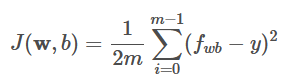

In [17]:
def compute_cost(X,y,W,b):
    m = len(X)
    prediction = predict(X,W,b)
    j = np.sum(np.square(np.subtract(prediction, y)))
    j = j * 1/(2*m)
    return j

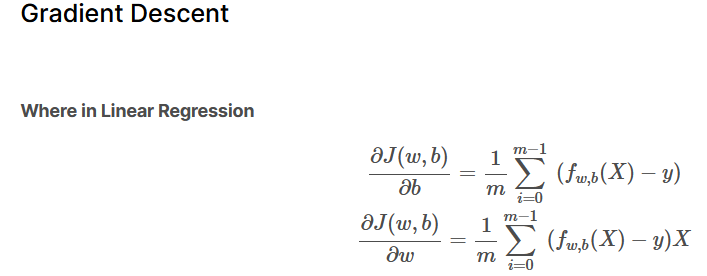

In [18]:
def compute_gradient(X,y,W,b):
    m = len(X)
    prediction = predict(X,W,b)
    db = 1/m * np.sum(np.subtract(prediction,y))
    dW =  1/m * np.sum(np.multiply(np.subtract(prediction,y),X))
    return dW, db


**Linear Regression Training**

In [19]:
def train(X, y, iterations, alpha): 
    # number of training examples
    m = len(X)

    # Initialize paramers
    W, b = initialize_parameters()
    for i in range(iterations):

        # Calculate the gradient and update the parameters
        dW, db = compute_gradient(X, y, W, b )  

        # Update Parameters using w, b, alpha and gradient
        W = W - alpha * dW               
        b = b - alpha * db               


        cost =  compute_cost(X, y, W, b)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {float(cost):8.2f}   ")
        
    return W, b 


Now let's train the model and get our parameters

In [20]:
W,b = train(X_train_norm ,y_train, 20000, 0.01)
print("w,b found by gradient descent:", W, b)

Iteration    0: Cost  1634.22   
Iteration 2000: Cost    22.23   
Iteration 4000: Cost     5.24   
Iteration 6000: Cost     4.03   
Iteration 8000: Cost     3.94   
Iteration 10000: Cost     3.93   
Iteration 12000: Cost     3.93   
Iteration 14000: Cost     3.93   
Iteration 16000: Cost     3.93   
Iteration 18000: Cost     3.93   
w,b found by gradient descent: 100.06549572017653 -0.10718917359583613



Evaluate the results on the test set

In [21]:
compute_cost(X_test_norm,y_test,W,b)

4.716475603545984